In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#background
N_bg = np.array([1.3896, 1.3696, 1.1497])
dN_bg = np.array([0.118, 0.117, 0.107])
mean_bg = np.sum(N_bg/dN_bg**2)/np.sum(1/dN_bg**2)


#measurements
current = np.concatenate((np.arange(0, 3.2, 0.2), np.array([3.05, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 4.0])))
N = np.array([1.255, 1.233, 1.311, 1.622, 1.922, 2.832, 3.077, 5.098, 6.298, 7.409, 7.875, 7.331, 6.131, 4.598,
              3.032, 4.143, 6.531, 7.786, 11.119, 10.574, 8.297, 4.199, 2.033, 1.155, 0.733, 0.666])
N -= mean_bg

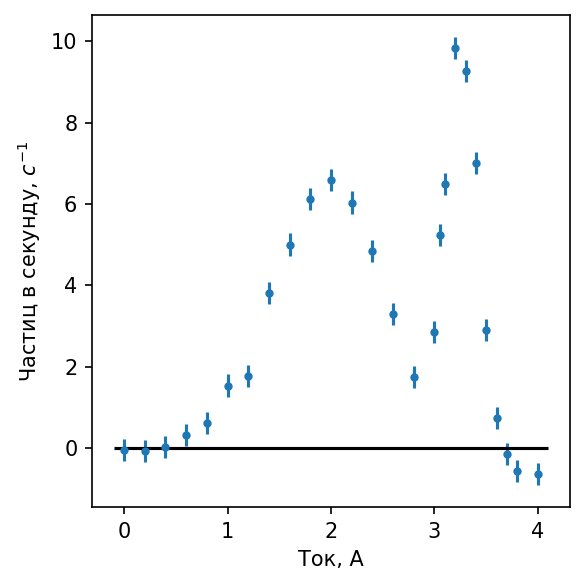

In [4]:
fig1, ax1 = plt.subplots(1, 1, dpi=150, figsize=(4,4))
ax1.errorbar(current, N, yerr=2.5*np.ones_like(N)*np.std(N_bg), marker='.', linestyle='')
ax1.set_xlabel('Ток, А')
ax1.set_ylabel('Частиц в секунду, $с^{-1}$')
ax1.hlines(0, -0.1, 4.1)


fig1.tight_layout()

X:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


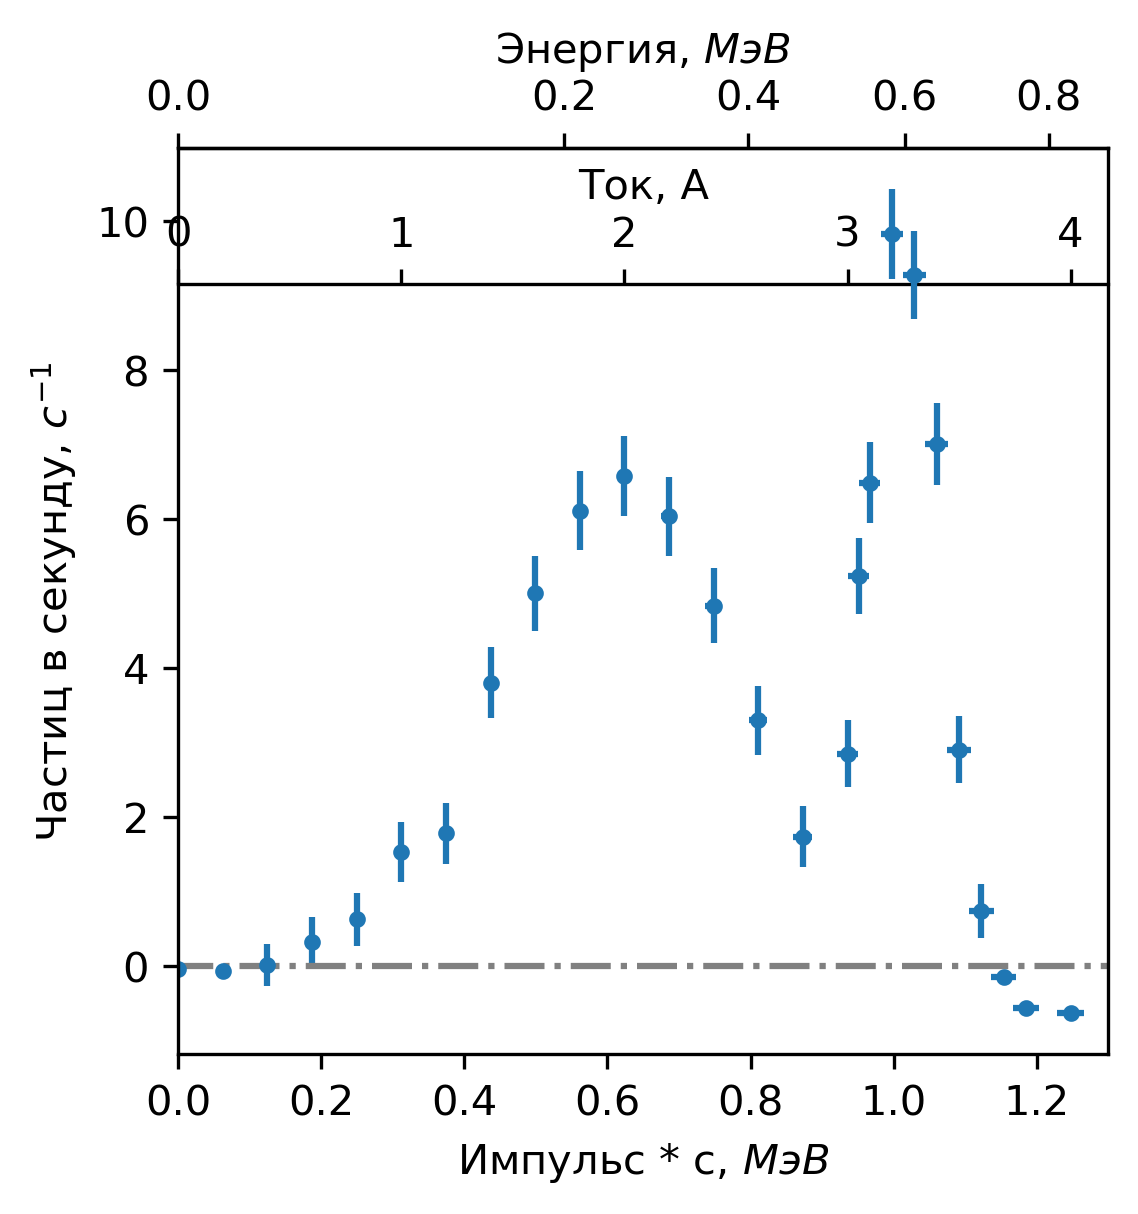

In [34]:
pc = current* (1.0135)/3.25
dpc = pc * 0.05/3.25

fig2, ax2 = plt.subplots(1, 1, dpi=300, figsize=(4, 4))
ax2.errorbar(pc, N, yerr=2.5*np.ones_like(N)*np.std(N_bg) + np.sqrt(N)/np.sqrt(90), xerr=dpc,  marker='.', linestyle='')
ax2.set_xlabel('Импульс * c, $МэВ$')
ax2.set_ylabel('Частиц в секунду, $с^{-1}$')
ax2.hlines(0, -0.1, 1.3, linestyle='-.', color='gray')
ax2.set_xlim((0, 1.3))

E0 = 0.511 #MeV
def pc_to_T(pc):
    return np.sqrt(E0**2 + pc**2) - E0

def T_to_pc(T):
    return np.sqrt((T+2E0)*T)

def pc_to_I(pc):
    return pc *3.25/1.0135

def I_to_pc(I):
    return I*(1.0135)/3.25

T_ax = ax2.secondary_xaxis(
        'top', functions=(pc_to_T, T_to_pc))
T_ax.set_xlabel("Энергия, $МэВ$")

I_ax = ax2.secondary_xaxis(
    0.85, functions=(pc_to_I, I_to_pc))
I_ax.set_xlabel("Ток, А")

fig2.savefig("figure_2.png")

'\npc_ax = ax3.secondary_xaxis(\n        \'top\', functions=(T_to_pc, pc_to_T))\npc_ax.set_xlabel("Импульс * c, $МэВ$")\n\nI_ax = ax3.secondary_xaxis(\n    1.2, functions=(T_to_I, I_to_T))\nI_ax.set_xlabel("Ток, А") '

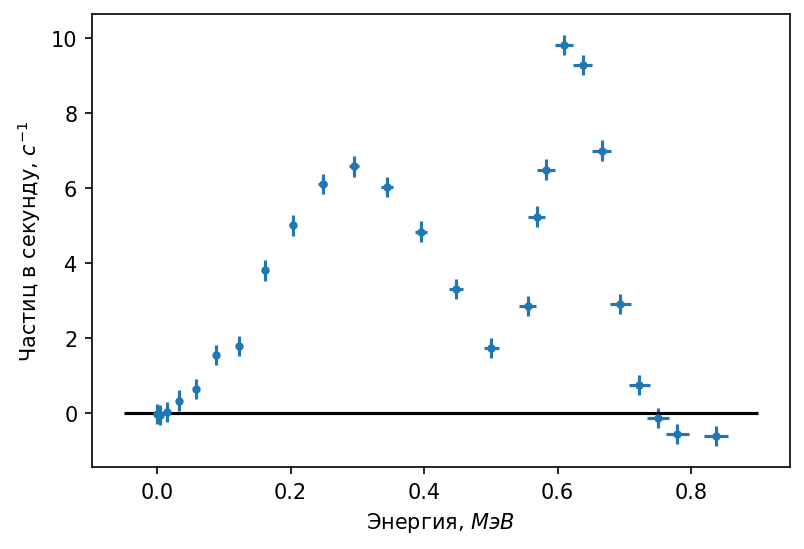

In [13]:
T = -E0 + np.sqrt(E0**2 + pc**2)
dT = pc/np.sqrt(E0**2 + pc**2) * dpc

fig3, ax3 = plt.subplots(1, 1, dpi=150)
ax3.errorbar(T, N, yerr=2.5*np.ones_like(N)*np.std(N_bg), xerr=dT,  marker='.', linestyle='')
ax3.set_xlabel('Энергия, $МэВ$')
ax3.set_ylabel('Частиц в секунду, $с^{-1}$')
ax3.hlines(0, -0.05, 0.9)

def T_to_I(T):
    return pc_to_I(T_to_pc(T))

def I_to_T(I):
    return pc_to_T(I_to_pc(I))

'''
pc_ax = ax3.secondary_xaxis(
        'top', functions=(T_to_pc, pc_to_T))
pc_ax.set_xlabel("Импульс * c, $МэВ$")

I_ax = ax3.secondary_xaxis(
    1.2, functions=(T_to_I, I_to_T))
I_ax.set_xlabel("Ток, А") '''

0.5917955556259036 0.02495148571505361


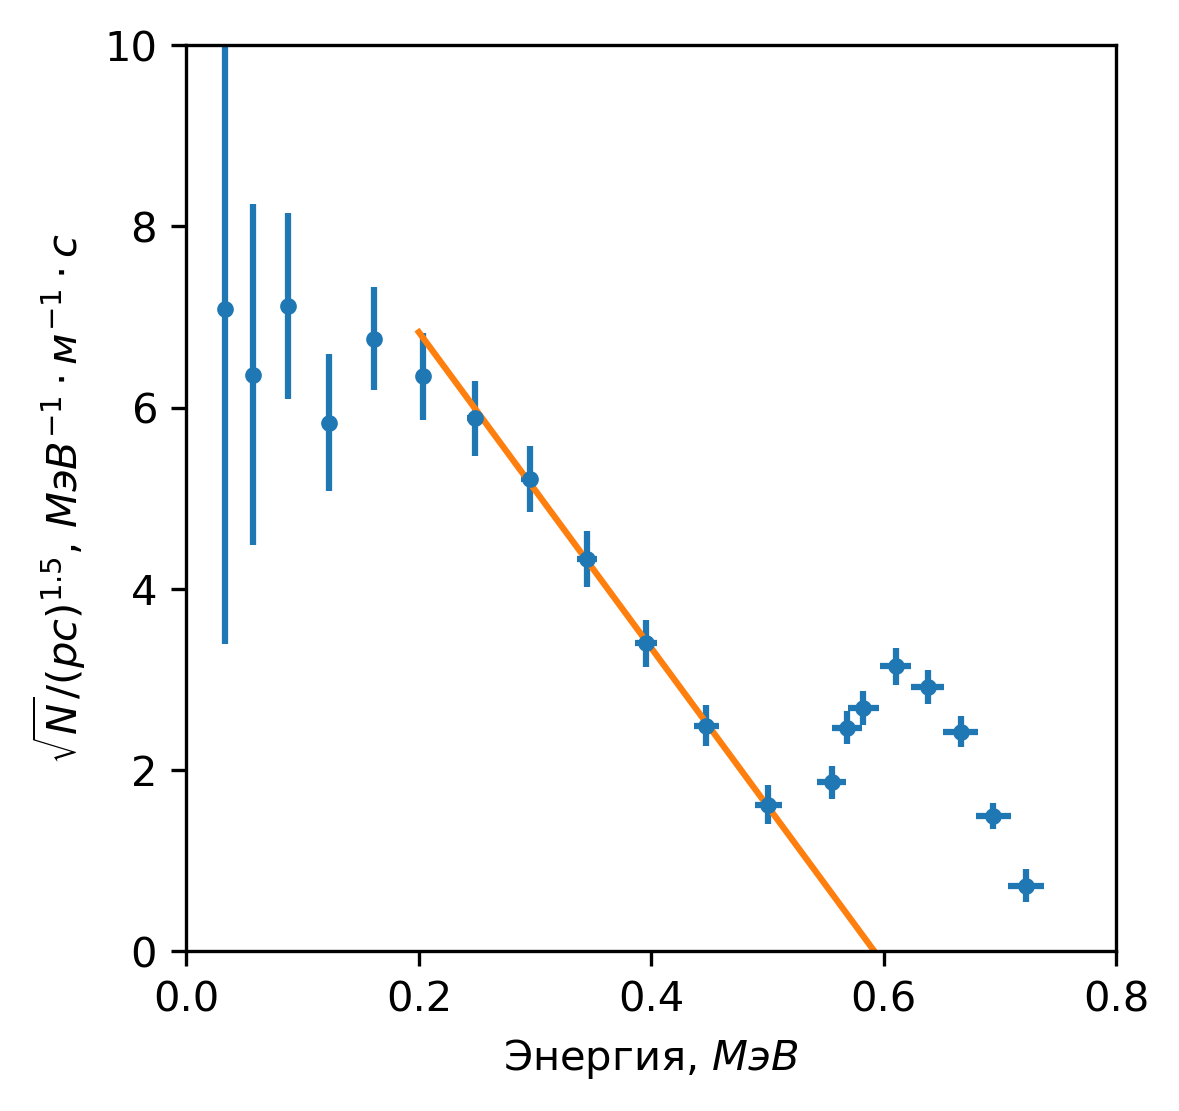

In [29]:
mask = (N>0.2).nonzero()

yFermi = np.sqrt(N[mask])/pc[mask]**1.5
dyFermi = yFermi*np.sqrt(0.25*(np.ones_like(N[mask])+np.sqrt(N[mask]))*np.std(N_bg)**2/N[mask]**2 + \
                         2.25*(dpc[mask]/pc[mask])**2)

mask3 = ((T[mask]>0.27)&(T[mask]<0.52)).nonzero()

c, V = np.polyfit(T[mask][mask3], yFermi[mask3], deg=1, w=1/dyFermi[mask3], cov=True)

T_max = -c[1]/c[0]
dT_max = T_max*np.sqrt(V[0][0]/c[0]**2 + V[1][1]/c[1]**2)
print(T_max, 2.5*dT_max)

fig4, ax4 = plt.subplots(1, 1, dpi=300, figsize=(4, 4))
ax4.errorbar(T[mask], yFermi, yerr=2.5*dyFermi, xerr=dT[mask],  marker='.', linestyle='')
ax4.set_xlabel('Энергия, $МэВ$')
ax4.set_ylabel('$\sqrt{N} / (pc)^{1.5}$, $МэВ^{-1} \cdot м^{-1} \cdot с$')
ax4.set_ylim((0, 10))
ax4.set_xlim((0, 0.8))

x = np.linspace(0.2, 0.6, 4)
ax4.plot(x, x*c[0]+c[1])

fig4.savefig("fig_4.png")

0.5922488837293197 0.010237281961454285


Populating the interactive namespace from numpy and matplotlib


X:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """
